# Reto: Análisis de datos Titanic

Daniel Salvador Cázares García	A01197517
Yoceline Aralí Mata Ledezma 	A01562116
Yolanda Elizondo Chapa		A01137848
Izael Manuel Rascón Durán 	        A01562240
Angel Corrales Sotelo 		        A01562052

### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Exploración de datos: Dataframe

### Lectura de archivos

In [2]:
df = pd.read_csv('train.csv', index_col="PassengerId") # Datos para entrenamientos
test_df = pd.read_csv('test.csv', index_col="PassengerId") # Datos para validación

In [4]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=123)

### Exploración de dataframe de entrenamiento

Columnas y tipos de datos

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 330 to 511
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       564 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Cabin     156 non-null    object 
 10  Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


Variables con valores faltantes: Age, Cabin, Embarked

In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q
204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


Estadística descriptiva: columnas numéricas

In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,564.000000,712.000000,712.000000,712.000000
mean,0.389045,2.324438,29.832908,0.512640,0.363764,32.388400
std,0.487876,0.828513,14.317771,1.114971,0.767469,52.218079
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


Estadística descriptiva: Columnas no numéricas

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,712,712,712,156,710
unique,712,2,576,119,3
top,"Pavlovic, Mr. Stefo",male,CA. 2343,G6,S
freq,1,461,7,4,515


Cantidad de datos faltantes

In [9]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         148
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       556
Embarked      2
dtype: int64

Variables con valores nulos: Age, Cabin, Embarked

Cantidad de registros duplicados

In [10]:
train_df.duplicated().sum()

0

In [11]:
# Tamaño del set de datos de entrenamiento
train_n = train_df.shape[0]
train_n

712

## Exploración de datos: Variables

### Correlación de las variables

<AxesSubplot:>

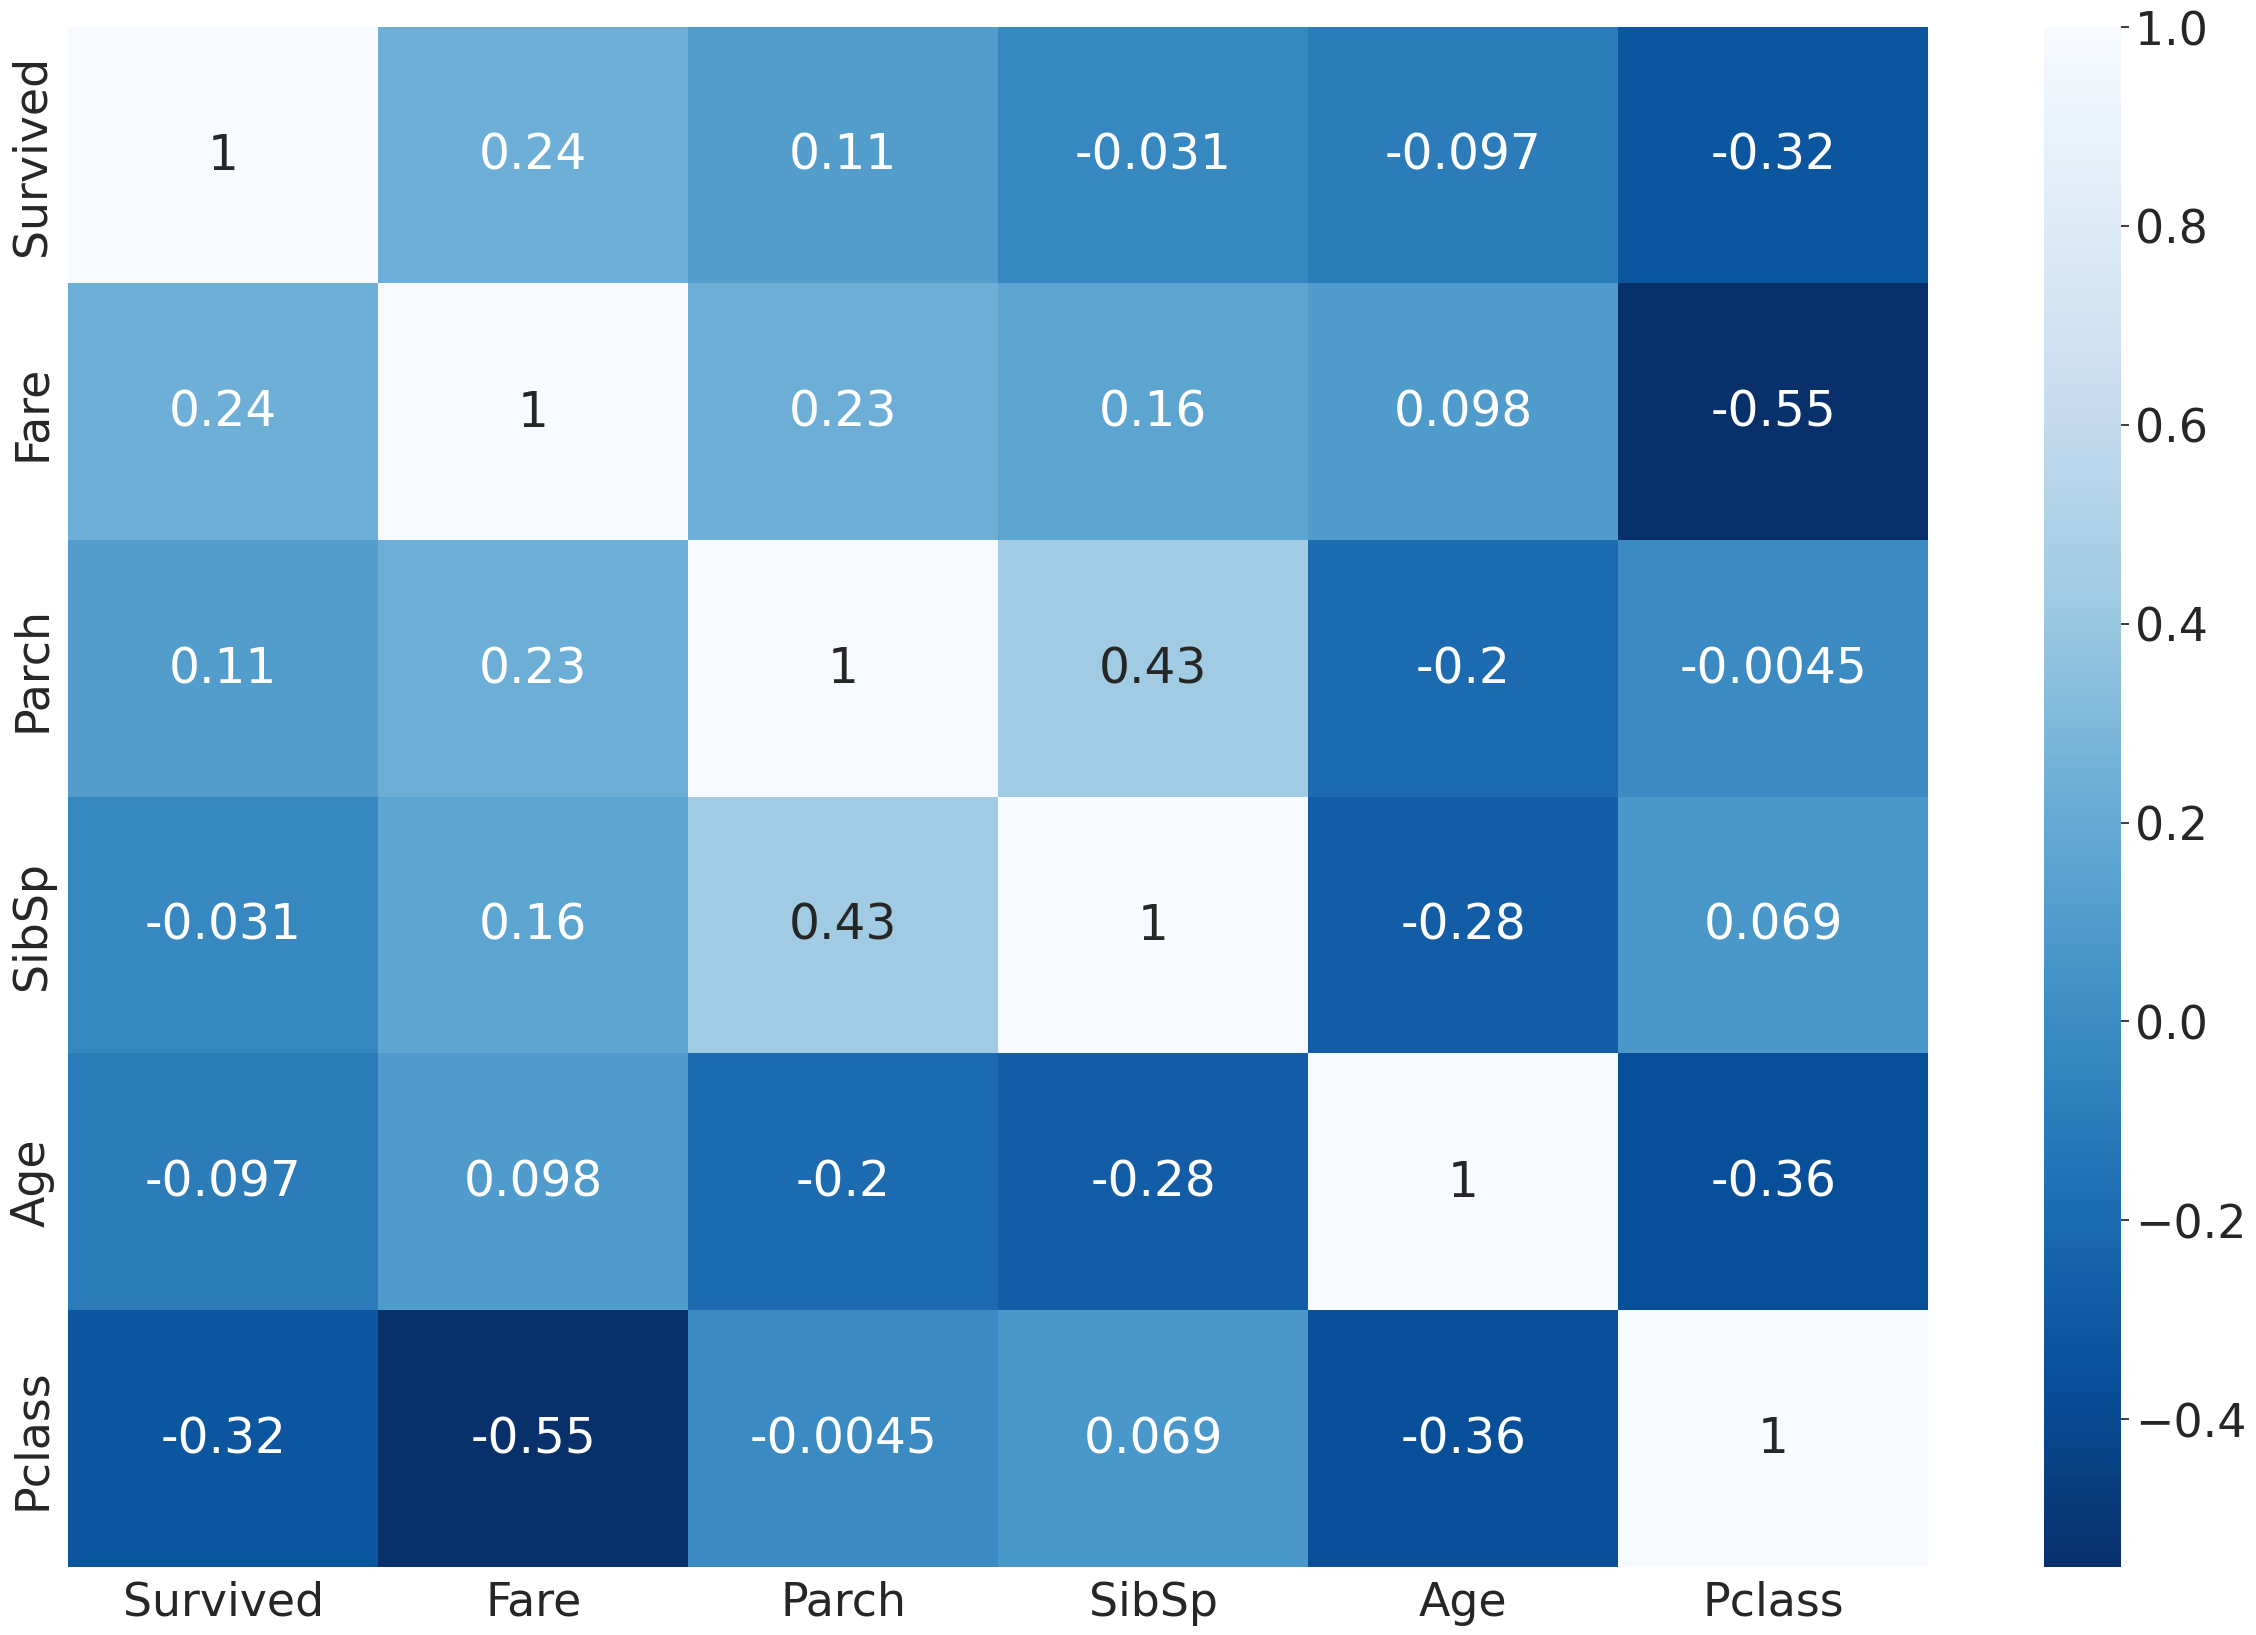

In [154]:
num_data = train_df[["Survived", "Fare", "Parch", "SibSp", "Age", "Pclass"]]
plt.figure(figsize=(30,20))
cor = num_data.corr()
sns.set(font_scale=3)
sns.heatmap(cor, annot=True,cmap="Blues_r",annot_kws = {'fontsize':35})

### Ticket

In [13]:
train_df[["Ticket", "Name"]].groupby(by="Ticket").count().sort_values(by="Name", ascending=False)

,Name
Ticket,
CA. 2343,7
S.O.C. 14879,5
1601,5
347082,5
19950,4
...,...
343275,1
343120,1
343095,1


In [14]:
train_df['Ticket'].duplicated(keep=False).sum()

229

#### Observaciones Ticket

Más del 20% de los datos son duplicados.



### Ticket Class (Pclass)

In [15]:
pclass = train_df.copy()
pclass.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [16]:
pclass.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,564.000000,712.000000,712.000000,712.000000
mean,0.389045,2.324438,29.832908,0.512640,0.363764,32.388400
std,0.487876,0.828513,14.317771,1.114971,0.767469,52.218079
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [17]:
# Porcentaje de sobrevivientes según la clase
pclass[['Pclass','Survived']].groupby(by='Pclass').mean()

,Survived
Pclass,
1,0.632530
2,0.469799
3,0.256927


In [18]:
# Número de sobrevivientes según la clase
pclass.loc[pclass['Survived']==1,['Pclass','Survived']].groupby(by='Pclass').count()

,Survived
Pclass,
1,105
2,70
3,102


In [19]:
pclass[['Pclass','Survived']].groupby(by='Pclass').count()

,Survived
Pclass,
1,166
2,149
3,397


In [20]:
pclass.loc[pclass['Survived']==0,['Pclass','Survived']].groupby(by='Pclass').count()

,Survived
Pclass,
1,61
2,79
3,295


In [21]:
# Promedio de precio de las clases
pclass[['Pclass','Fare']].groupby(by='Pclass').mean()

,Fare
Pclass,
1,88.390788
2,20.784228
3,13.327003


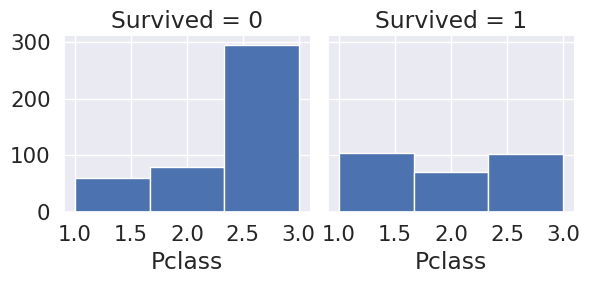

In [202]:
g = sns.FacetGrid(pclass, col='Survived')
#g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
sns.set(font_scale=1)
g.map(plt.hist, 'Pclass', bins=3)

<AxesSubplot:title={'center':'Fare'}, xlabel='[Pclass]'>

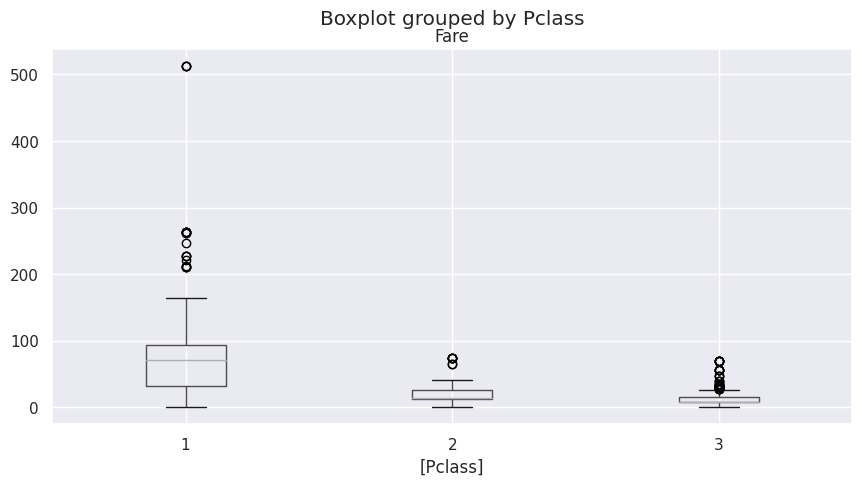

In [203]:
pclass[["Pclass", "Fare"]].boxplot(by="Pclass", figsize=(10,5))

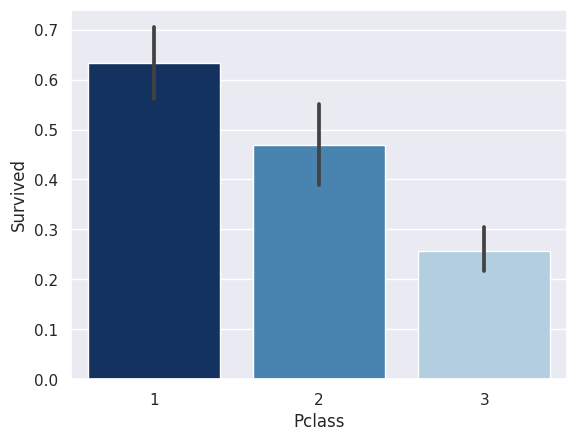

In [204]:
colors = plt.cm.Blues_r(np.linspace(0, 1, 4))
sns.barplot(x = pclass['Pclass'],y = pclass['Survived'], palette=colors)
plt.show()

#### Observaciones Ticket Class (Pclass)
Se observa una clara diferencia entre la cantidad de sobrevivientes y la clase a la que pertenece:
1ra clase: Mayor porcentaje de sobrevivientes con 0.629
2da clase: Segundo mayor porcentaje de sobrevivientes 0.472
3ra clase: Menor porcentaje de sobrevivientes con 0.242

Número de pasajeros y las clases a las que pertencen
1ra clase: 216
2da clase: 184
3ra clase: 491

El atributo Pclass tiene una correlación inversa de -0.34 con la supervivencia, siendo de las correlaciones más altas en comparación con la correlación de las demás variables con la supervivencia.






### Fare

Correlación entre variables numéricas

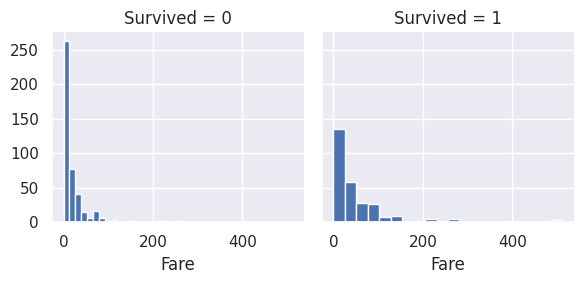

In [209]:
g = sns.FacetGrid(train_df, col='Survived')
#g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
g.map(plt.hist, 'Fare', bins=20)

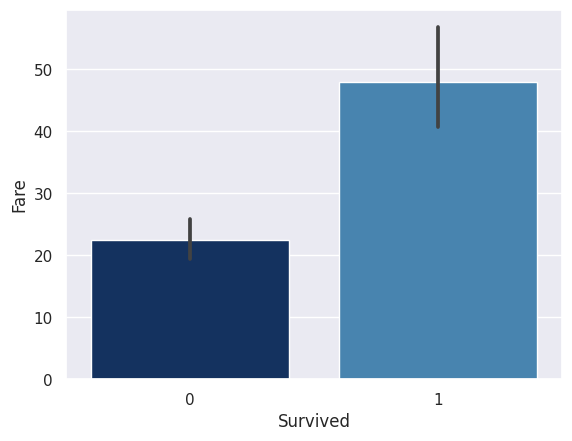

In [210]:
sns.set(font_scale=1)
sns.barplot(x = train_df['Survived'],y = train_df['Fare'], palette=colors)
plt.show()

#### Observaciones Fare

* La variable Fare tiene una correlación de 0.26 con la variable Survived, en comparación con la correlación de Survived con otras variables, la variable Fare tiene de las correlaciones más altas.

* Quienes sobrevivieron pagaron una tarifa mayor en comparación a aquellos que no sobrevivieron. Esto se observa en la gráfica de barras en donde las personas que no sobrevivieron pagaron en promedio algo cercano a 22, mientras que las que sobrevivieron pagaron en promedio algo cercano a 50; así como el la gráfica de parejas.

Dadas estas observaciones, se tomara a Fare como una variable para el entrenamiento del modelo. 


Outliers

<AxesSubplot:>

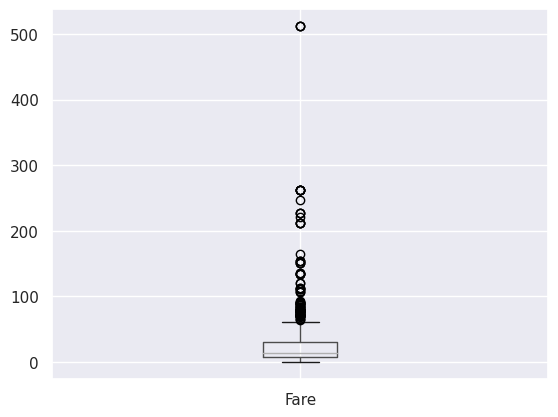

In [211]:
train_df[["Fare"]].boxplot()

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

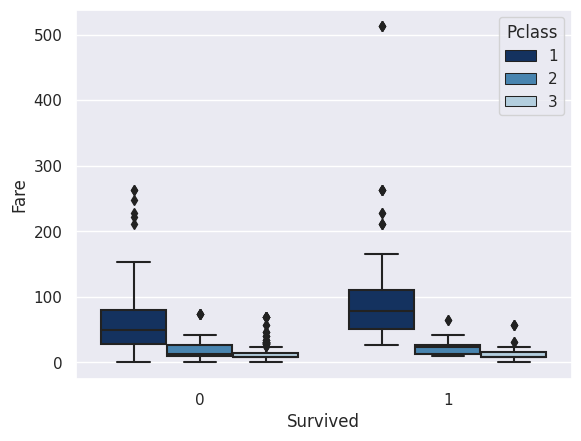

In [213]:
sns.boxplot(data=train_df,y='Fare',x='Survived',hue='Pclass', palette=colors)

<AxesSubplot:title={'center':'Fare'}, xlabel='[Pclass]'>

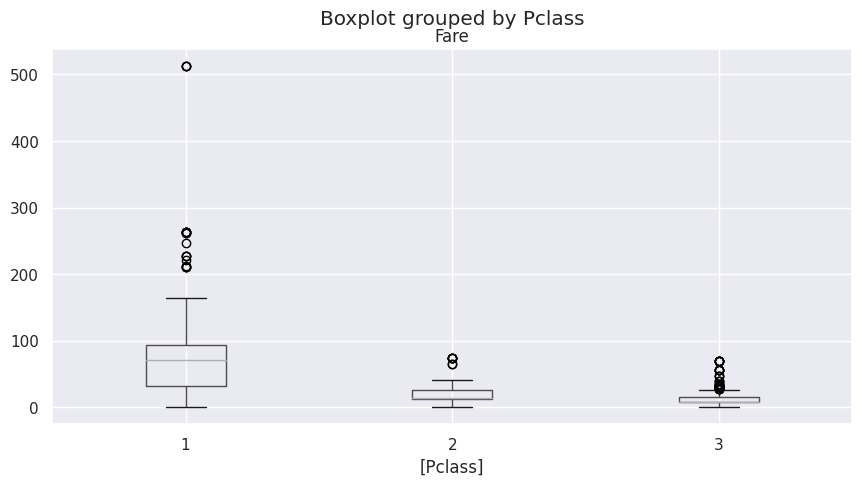

In [214]:
train_df[["Pclass", "Fare"]].boxplot(by="Pclass", figsize=(10,5))

### Título personal  (Name)

Se hizo la extracción de nuevos datos a partir de la columna de nombres, a la cual se le extrajo el título de la persona y se agregó a una nueva columna:

In [30]:
def name_to_title(name):
    title = name.split(".")[0].split(" ")[1]
    if title.endswith(",") or title[0].islower():
        return None
    return title

In [31]:
train_df["Title"] = train_df["Name"].apply(name_to_title)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,Miss
750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q,Mr
204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,Mr
422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q,Mr
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,Mr


Observamos la relación entre el promedio de supervivencia y los títulos.

In [32]:
_deepnote_run_altair(train_df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"Title","scale":{"type":"linear","zero":false}},"y":{"bin":false,"sort":null,"type":"quantitative","field":"Survived","scale":{"type":"linear","zero":true},"aggregate":"average"},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Como se muestra, los títulos más populares entre los pasajeros son los de "Mr", "Miss", "Mrs", y "Master"

In [33]:
train_df["Title"].value_counts()

Mr        407
Miss      148
Mrs        93
Master     30
Dr          4
Rev         4
Mme         1
Col         1
Capt        1
Ms          1
Mlle        1
Major       1
Don         1
Name: Title, dtype: int64

In [34]:
train_df["Title"].value_counts().sum()

693

El 97.19% de las personas están registradas con un título

In [35]:
train_df["Title"].value_counts().sum()/891

0.7777777777777778

Claramente existe una relación entre la edad y los títulos, pero como se verá más adelante, el título sigue aportando información relevante.

<AxesSubplot:title={'center':'Age'}, xlabel='[Title]'>

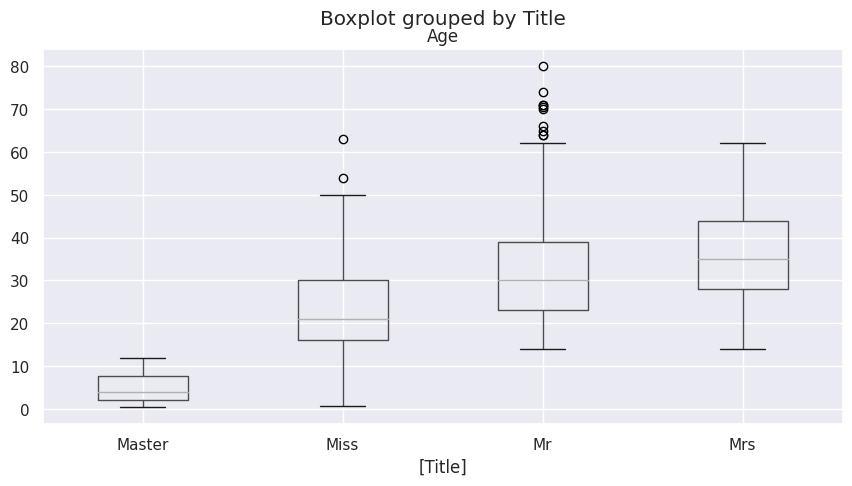

In [215]:
train_df[["Title", "Age"]].boxplot(by="Title", figsize=(10,5))

Los títulos "Mr", "Miss", "Mrs" y "Master" son los títulos más representativos del conjunto de títulos (el 94.5 % de los datos tienen estos títulos). Así que conservaremos solo estos:

In [37]:
# Porcentaje de datos con los títulos 'Mr', 'Miss', 'Mrs' y 'Master'
train_df['Title'].value_counts()[['Mr', 'Miss', 'Mrs', 'Master']].sum()/train_n

0.952247191011236

In [38]:
def clean_title(title, compared_titles = ('Mr', 'Miss', 'Mrs', 'Master')):
    '''
        This function take a string and return it only if is contained in
        "compared_titles" parameter. Otherwise, return NaN.
    '''
    if title in compared_titles:
        return title
    else:
        return None

Número de títulos en los datos:

In [39]:
train_df['Title'] = train_df['Title'].apply(clean_title)
train_df['Title'].value_counts()

Mr        407
Miss      148
Mrs        93
Master     30
Name: Title, dtype: int64

Porcentaje de títulos en los datos:

In [40]:
train_df['Title'].value_counts()/train_n

Mr        0.571629
Miss      0.207865
Mrs       0.130618
Master    0.042135
Name: Title, dtype: float64

Transformamos los títulos (datos categóricos) en datos numéricos (dummy variables) con el uso de  pd.get_dummies()

In [41]:
df_with_title_dummies = pd.get_dummies(train_df, columns = ['Title'])
df_with_title_dummies.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,
330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,0,1,0,0
750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q,0,0,1,0
204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,0,0,1,0
422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q,0,0,1,0
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,0,0,1,0


In [42]:
train_df_final=df_with_title_dummies.copy()

Se observa que los títulos tienen una relación relevante con la supervivencia, a excepción del título "Master".

<AxesSubplot:>

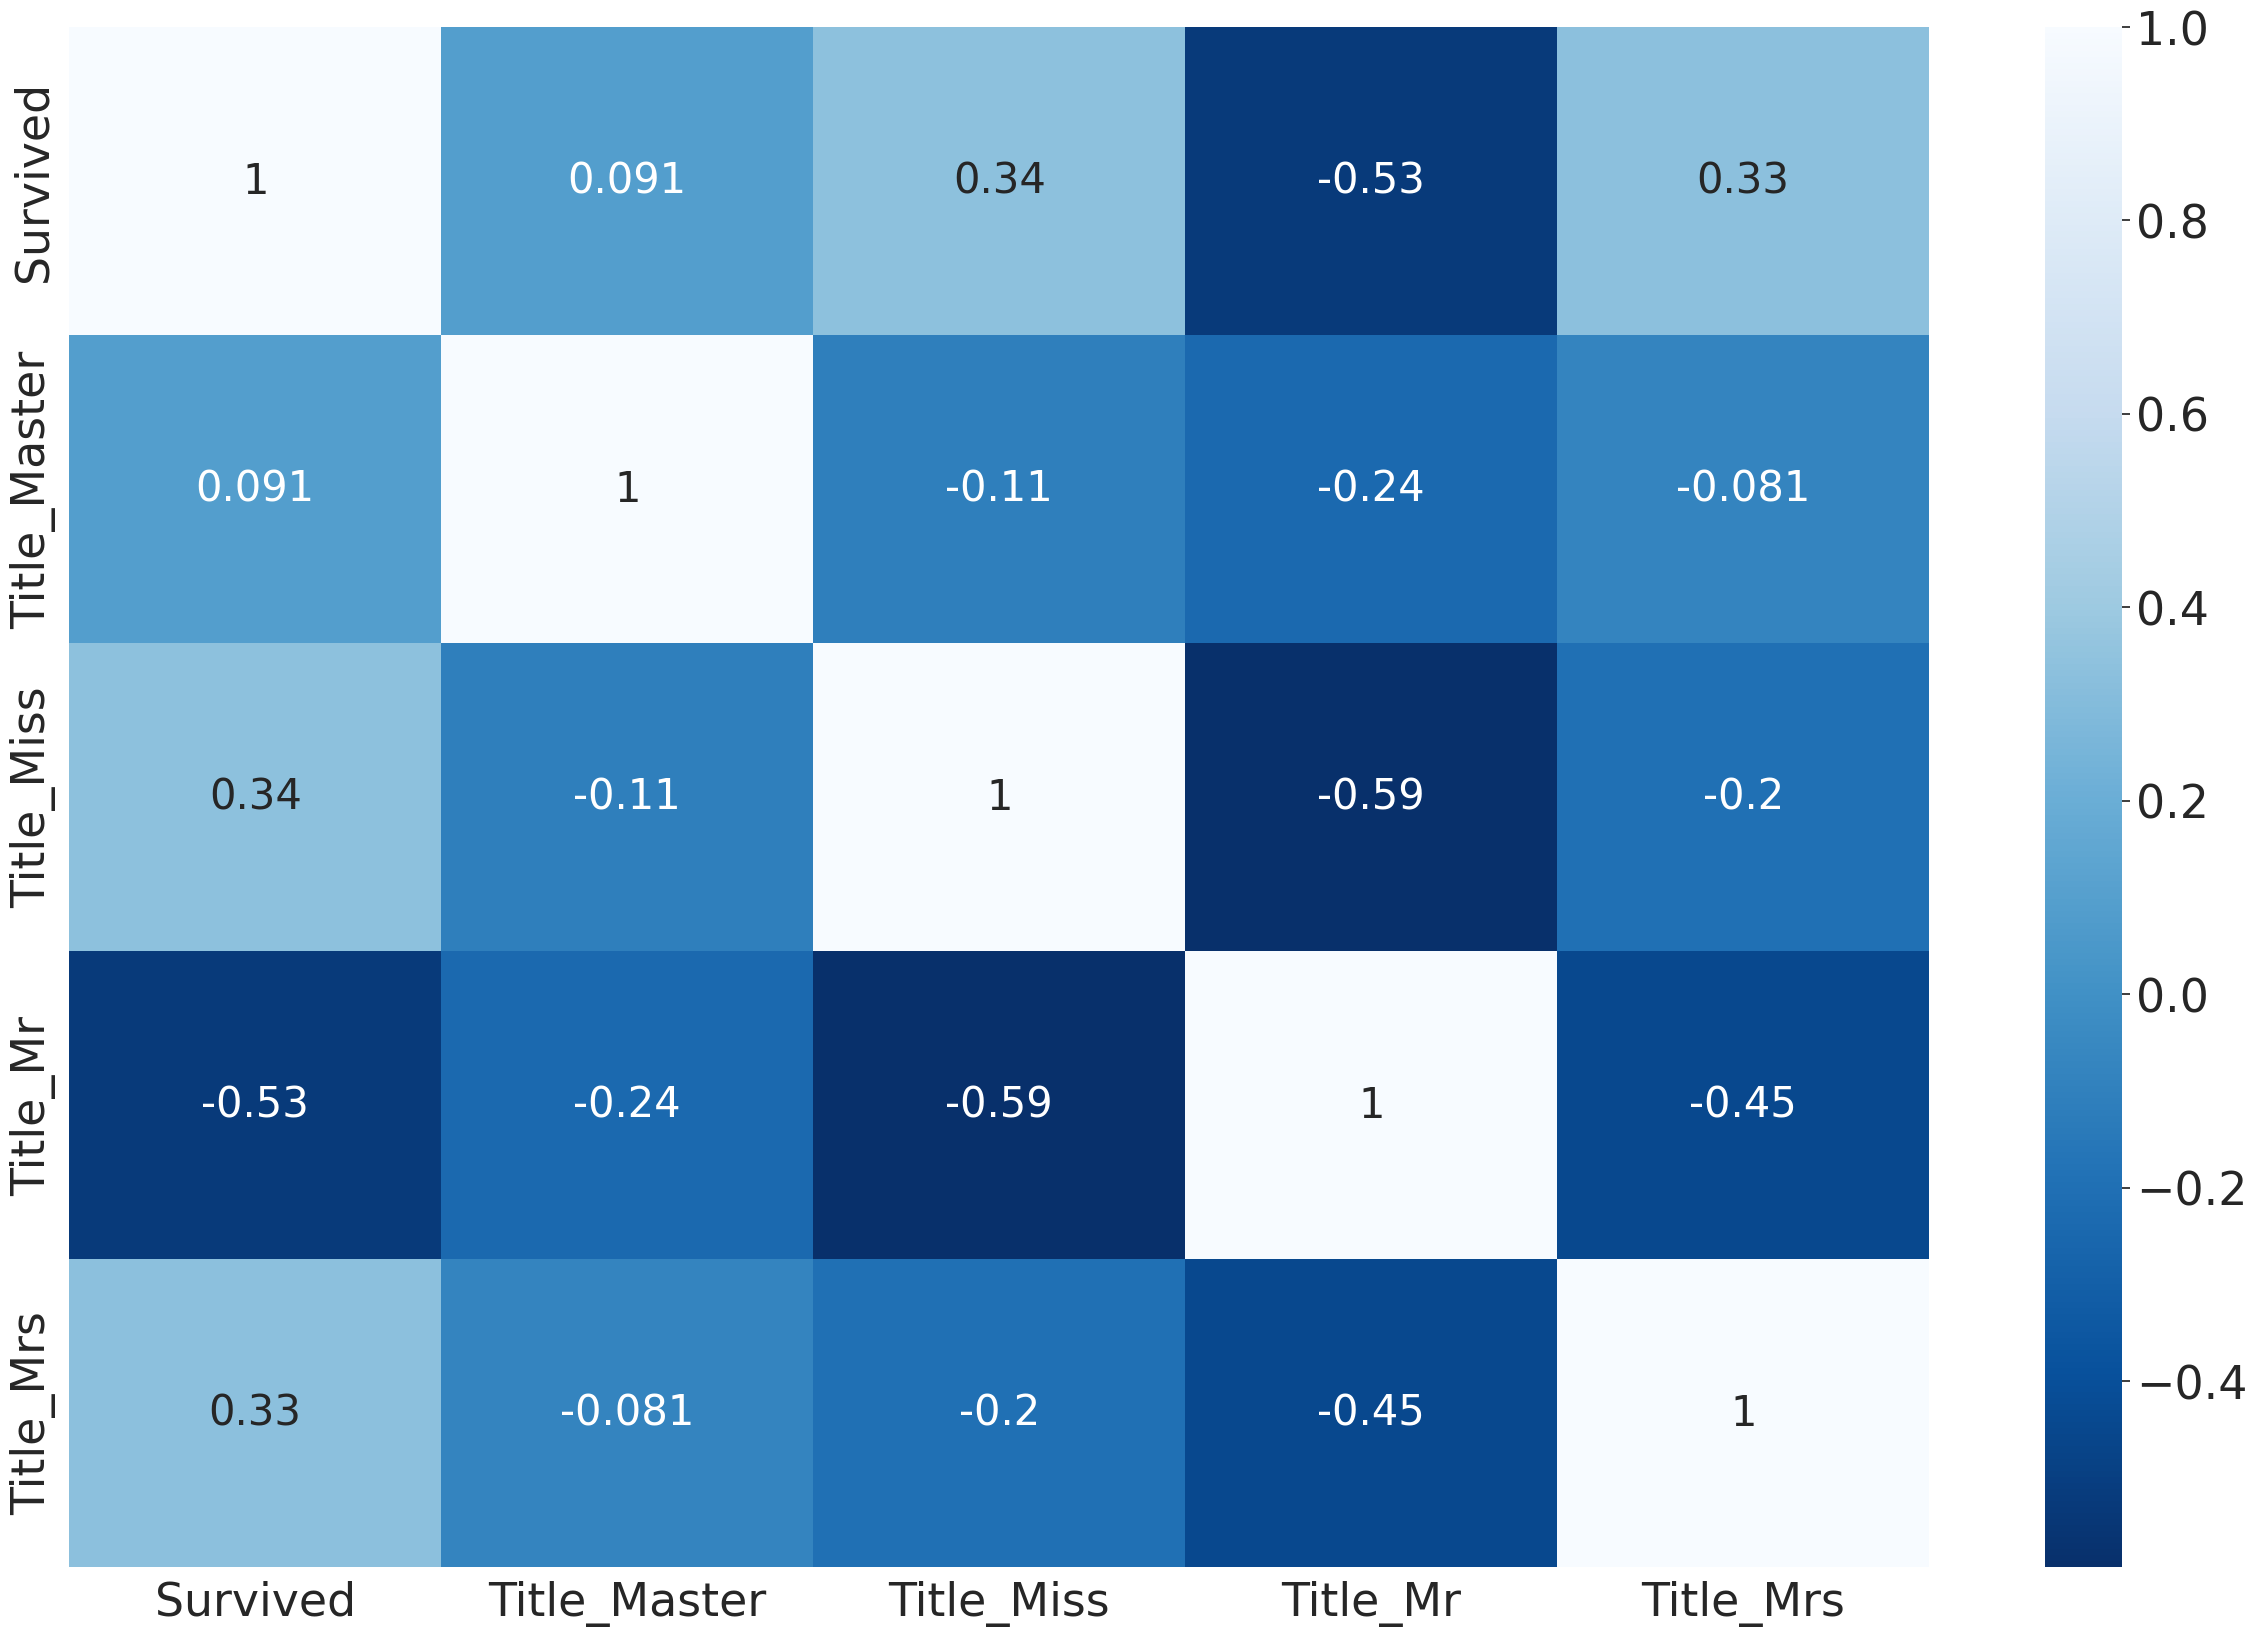

In [158]:
title_corr_df = df_with_title_dummies[['Survived', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']]
plt.figure(figsize=(30,20))
cor = title_corr_df.corr()
sns.set(font_scale=3)
sns.heatmap(cor, annot=True, cmap="Blues_r",annot_kws = {'fontsize':30})

#### Observaciones de Title
Title_Master
* El 4.49% de las personas tienen este título.
* Tiene una correlación de 0.085 con la supervivencia, por lo que es candidata ser descartada.

Title_Miss
* El 20% de las personas tienen este título.
* Tiene una correlación de 0.33 con la supervivencia, lo que quiere decir que es relevante para predecir la supervivencia de alguien.

Title_Mr 
* El 56.34% de las personas tienen este título.
* Tiene una correlación de -0.53 con la supervivencia, lo que quiere decir que es relevante para predecir la supervivencia de alguien.

Title_Mrs
* El 13.58% de las personas tienen este título.
* Tiene una correlación de 0.34 con la supervivencia, lo que quiere decir que es relevante para predecir la supervivencia de alguien.

In [44]:
sns.set(font_scale=1)

### SibSp and Parch

Se analiza la opción de crear una variable "Family" la cual contiene el Número de hermanos y esposos y número de padres e hijos.

Se analiza la opción de crear una variable "Alone" la cual tendra 0=la persona NO esta sola y 1=la persona esta sola, es decir si hay algún familiar con el o no

In [45]:
train_df_f = train_df.copy()

Text(0, 0.5, '# of people')

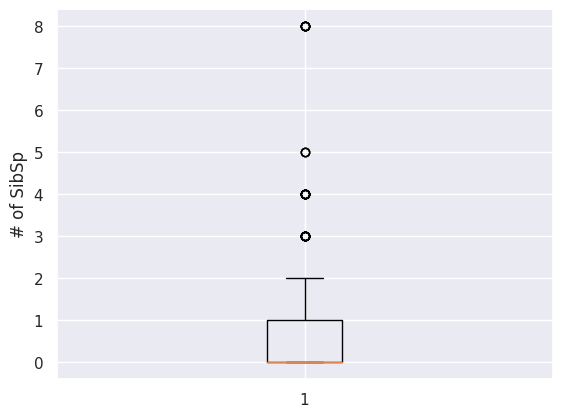

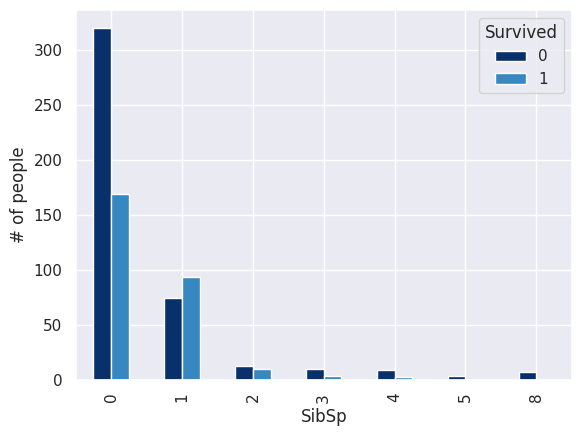

In [216]:
plt.ylabel('# of SibSp')
plt.boxplot(train_df_f['SibSp'])

train_df_f.groupby(['SibSp','Survived']).size().unstack(fill_value=0).plot.bar(color=colors)
plt.ylabel("# of people")

Text(0, 0.5, '# of people')

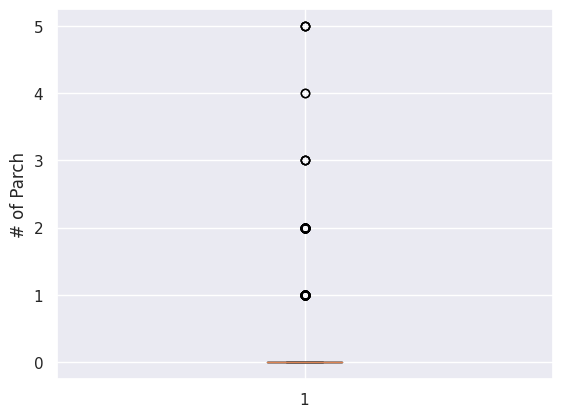

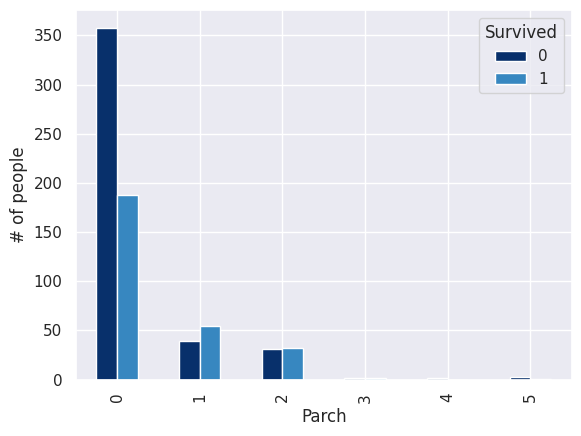

In [217]:
plt.ylabel('# of Parch')
plt.boxplot(train_df_f['Parch'])

train_df_f.groupby(['Parch','Survived']).size().unstack(fill_value=0).plot.bar(color=colors)
plt.ylabel("# of people")

Text(0, 0.5, '# of people')

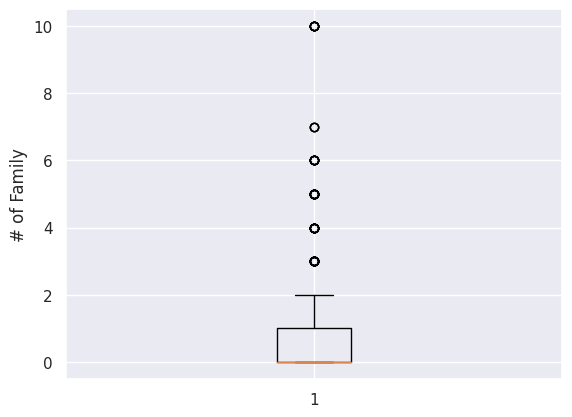

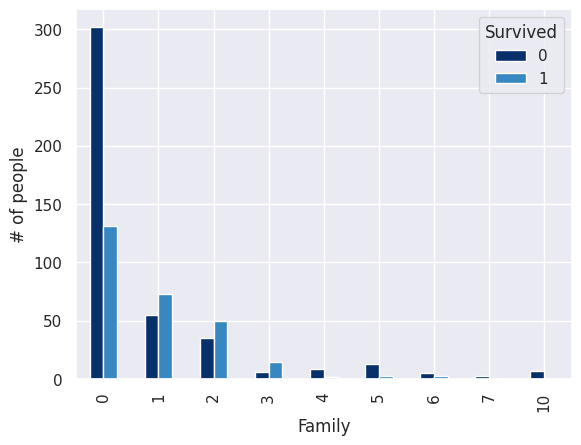

In [218]:
train_df_f['Family'] = train_df_f['SibSp'] + train_df_f['Parch']

plt.ylabel('# of Family')
plt.boxplot(train_df_f['Family'])

train_df_f.groupby(['Family','Survived']).size().unstack(fill_value=0).plot.bar(color=colors)
plt.ylabel("# of people")

Text(0, 0.5, '# of people')

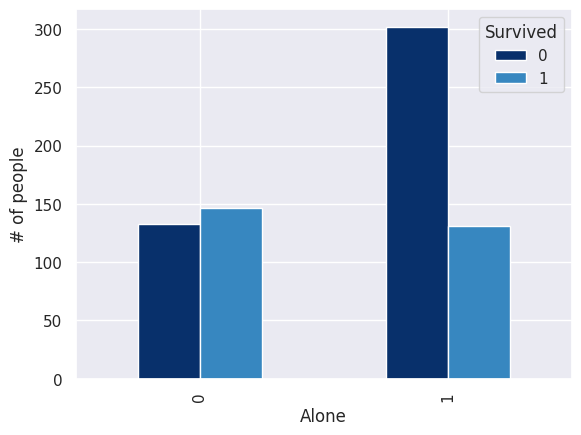

In [219]:
train_df_f['Alone'] = train_df_f['Family']
train_df_f['Alone'] = train_df_f['Alone'].replace([0,1,2,3,4,5,6,7,10],[1,0,0,0,0,0,0,0,0,])

train_df_f.groupby(['Alone','Survived']).size().unstack().plot.bar(color=colors)
plt.ylabel("# of people")

In [50]:

train_df_f[["Alone", "Survived"]].groupby(['Alone']).mean().sort_values(by='Survived', ascending=False)

,Survived
Alone,
0,0.523297
1,0.302540


<AxesSubplot:>

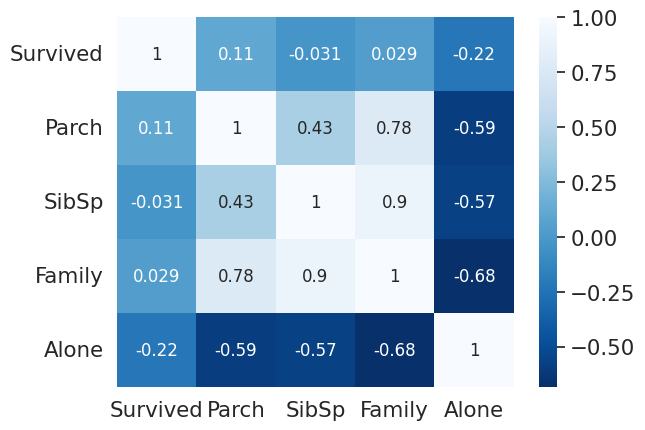

In [168]:
heatmapData = train_df_f[["Survived", "Parch", "SibSp", "Family", "Alone"]]
sns.set(font_scale=1.4)
sns.heatmap(heatmapData.corr(), annot=True, cmap="Blues_r", annot_kws = {'fontsize':12})

![Picture title](image-20220914-195142.png)

In [52]:
train_df_final["Alone"] = train_df_f["Alone"]

#### Observaciones de SibSp y Parch
Variable SibSp 
* Aproximadamente el 67% de los datos son igual a 0 hermanos, y solo sobrevivió la mitad de las personas que tenian 0 hermanos, un 33%.
* No muestra una correlación alta con la Variable de Suvived, ya que es de .082.

Variable Parch
* Poco más del 70% de los datos son igual a 0 padres, y solo sobrevivió la mitad.
* No muestra una correlación alta con la Variable de Suvived, ya que es de -.035.

Variable Family
* Aproximadamente el 56% de los datos son igual a 0 miembros de familias.
* No muestra mejora respecto a la correlación de SibSp y Parch

Variable Alone
* El 50% de los pasageros estaban solos, de los cuales sobrevivieron la mitad 
* El 30% de los pasageros NO estaban solos
* La correlación con Survived mejoró un poco, llegando a .2 

### Embarked

Es una variable categórica, la cual contiene la información del puerto donde embarcaron (C = Cherbourg, Q = Queenstown, S = A)

Text(0, 0.5, '# of people')

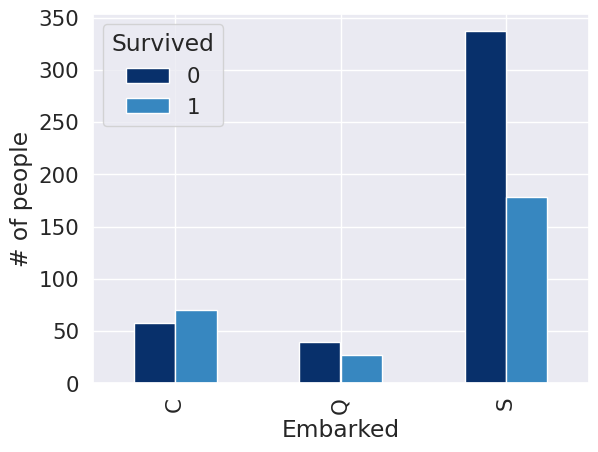

In [ ]:
train_df.groupby(['Embarked','Survived']).size().unstack(fill_value=0).plot.bar(color=colors)
plt.ylabel("# of people")

Embarked       C   Q    S
Sex Survived             
0   0         52  31  288
    1         22   3   65
1   0          6   9   49
    1         48  24  113


<AxesSubplot:xlabel='Sex,Survived'>

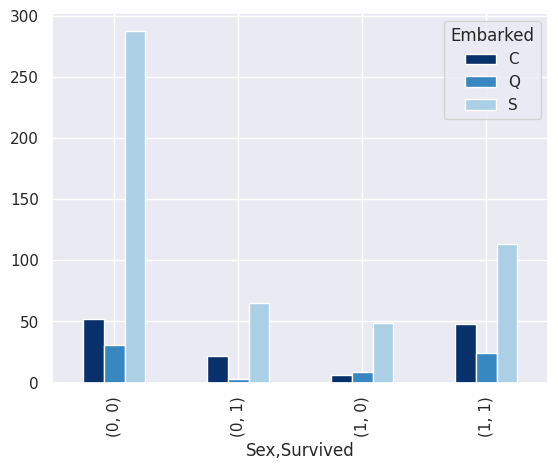

In [220]:
train_df_f['EmbarkedNum'] = train_df_f['Embarked'].replace(['C','Q','S'],[0,1,2])
print(train_df_f.groupby(['Sex','Survived',"Embarked"]).size().unstack(fill_value=0))

train_df_f.groupby(['Sex','Survived',"Embarked"]).size().unstack(fill_value=0).plot.bar(color=colors)

<AxesSubplot:>

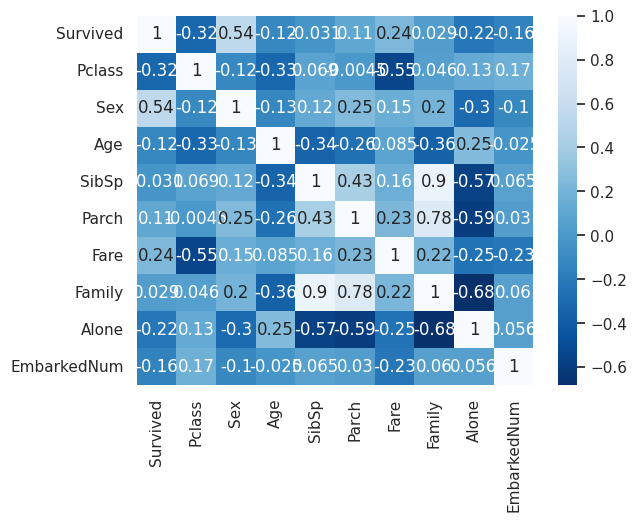

In [148]:
train_df_f['EmbarkedNum'] = train_df['Embarked'].replace(['C','Q','S'],[0,1,2])
sns.heatmap(train_df_f.corr(), annot=True, cmap="Blues_r")

In [56]:
train_df_final["Embarked"] = train_df_f['EmbarkedNum']

#### Observaciones de Embarked
* La mayor correlación que muestra Embarked es con Pclass con .16, sin embargo con nuestra variable objetivo "Survived" solo muestra una correlación de -.17.
* Aproximadamente el 50% de las personas que se subieron en el puerto de Southampton NO se sobrevivieron,  esto  puede estar relacionado con que más de la mitad de las personas de Southampton eran hombres






### Sex

Survived    0    1
Sex               
0         371   90
1          64  187


Text(0, 0.5, '# of people')

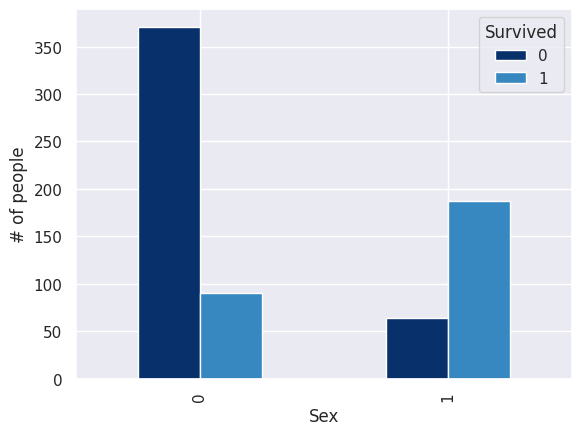

In [221]:
print(train_df_f.groupby(['Sex','Survived']).size().unstack(fill_value=0))
train_df_f.groupby(['Sex','Survived']).size().unstack(fill_value=0).plot.bar(color=colors)
plt.ylabel("# of people")

In [58]:
train_df_f['Sex'] = train_df_f['Sex'].replace(['male','female'],[0,1])
train_df_final["Sex"] = train_df_f['Sex']

#### Observaciones de Sex
* El 64% de los pasajeros eran hombres
* El 81% de las hombres fallecieron
* El 25% de las mujeres fallecieron
* La correlación de Sex con Survived es de .54, lo cual es alta a comparación de otras variables.

Dada la alta correlación, la variable Sex se usara para el modelo.

### Age

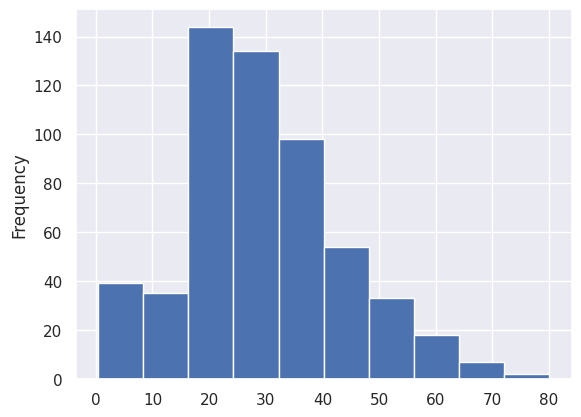

In [59]:
train_df_f['Age'].plot.hist();

In [60]:
# Se puede hacer grupos con la edad 
train_df_f['Age'] = train_df_f['Age'].mask(train_df_f['Age'] <= 5, 1)
train_df_f['Age'] = train_df_f['Age'].mask((train_df_f['Age'] > 5) & (train_df_f['Age'] <= 10), 2)
train_df_f['Age'] = train_df_f['Age'].mask((train_df_f['Age'] > 10) & (train_df_f['Age'] <= 15), 3)
train_df_f['Age'] = train_df_f['Age'].mask((train_df_f['Age'] > 15) & (train_df_f['Age'] <= 20), 4)
train_df_f['Age'] = train_df_f['Age'].mask((train_df_f['Age'] > 20) & (train_df_f['Age'] <= 30), 5)
train_df_f['Age'] = train_df_f['Age'].mask((train_df_f['Age'] > 30) & (train_df_f['Age'] <= 40), 6)
train_df_f['Age'] = train_df_f['Age'].mask((train_df_f['Age'] > 40) & (train_df_f['Age'] <= 50), 7)
train_df_f['Age'] = train_df_f['Age'].mask((train_df_f['Age'] > 50) & (train_df_f['Age'] <= 60), 8)
train_df_f['Age'] = train_df_f['Age'].mask((train_df_f['Age'] > 60) & (train_df_f['Age'] <= 70), 9)
train_df_f['Age'] = train_df_f['Age'].mask((train_df_f['Age'] > 70) & (train_df_f['Age'] <= 80), 10)

train_df_f

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Alone,EmbarkedNum
PassengerId,,,,,,,,,,,,,,,
330,1,1,"Hippach, Miss. Jean Gertrude",1,4.0,0,1,111361,57.9792,B18,C,Miss,1,0,0.0
750,0,3,"Connaghton, Mr. Michael",0,6.0,0,0,335097,7.7500,NaN,Q,Mr,0,1,1.0
204,0,3,"Youseff, Mr. Gerious",0,7.0,0,0,2628,7.2250,NaN,C,Mr,0,1,0.0
422,0,3,"Charters, Mr. David",0,5.0,0,0,A/5. 13032,7.7333,NaN,Q,Mr,0,1,1.0
98,1,1,"Greenfield, Mr. William Bertram",0,5.0,0,1,PC 17759,63.3583,D10 D12,C,Mr,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",1,6.0,0,1,231919,23.0000,NaN,S,Mrs,1,0,2.0
323,1,2,"Slayter, Miss. Hilda Mary",1,5.0,0,0,234818,12.3500,NaN,Q,Miss,0,1,1.0
383,0,3,"Tikkanen, Mr. Juho",0,6.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,Mr,0,1,2.0


Survived    0   1
Age              
1.0         9  22
2.0        10   6
3.0         5   8
4.0        47  30
5.0       111  73
6.0        72  57
7.0        40  23
8.0        20  13
9.0        10   3
10.0        4   1


Text(0, 0.5, '# of people')

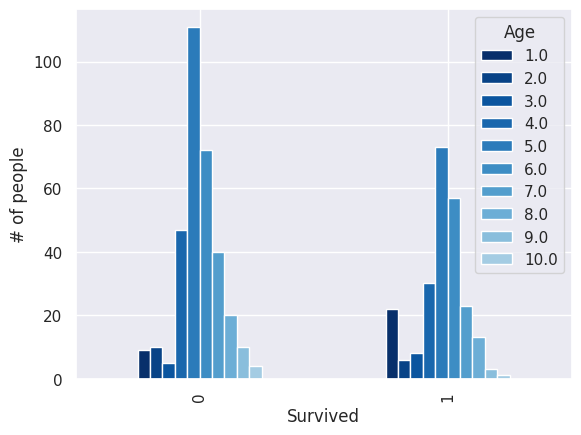

In [225]:
colors2 = plt.cm.Blues_r(np.linspace(0, 1, 15))
print(train_df_f.groupby(['Age','Survived']).size().unstack(fill_value=0))
train_df_f.groupby(['Survived','Age']).size().unstack(fill_value=0).plot.bar(color=colors2)
plt.ylabel("# of people")

<AxesSubplot:>

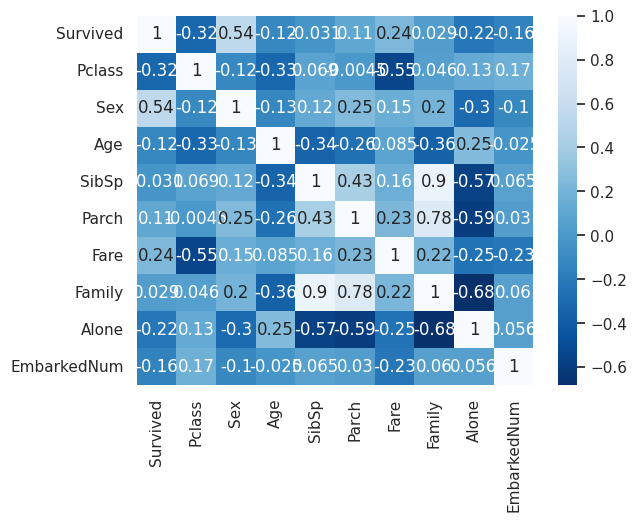

In [149]:
sns.heatmap(train_df_f.corr(), annot=True, cmap="Blues_r")

### Cabin

Se observa que los datos proporcionados son solo 204 y el resto son nulos, por lo tanto no se tomará en cuenta esta columna. 

In [63]:
train_df_f['Cabin'].isna().sum()

556

## Preparación de datos

#### Columnas a utilizar
- Sex
- Fare
- Pclass
- Alone 
- Title
- Embarked
- Age

#### Columnas que no se van a utilizar
- Cabin: Se decide no utilizarla debido a que tiene más de la mitad de los datos faltantes, por lo que sería díficil encontrar  información relevante a partir de esta. 
- PassengerId: Debido a la poca correlación que tiene con la variable Survived y que se trata de una variable asignada de forma aleatoria para cada pasajero, se decide no utilizarla.
- Ticket: Tiene una gran cantidad de datos repetidos, por lo que se decide no utilizarla.
- Parch
- SibSp
- Name



*Puede revisar la decisión de elección del resto de las columnas en la sección de exploración de datos.

In [64]:
del(train_df_final['Cabin'])
del(train_df_final['Ticket'])
del(train_df_final['SibSp'])
del(train_df_final['Parch'])
del(train_df_final['Name'])
train_df_final.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Alone'],
      dtype='object')

In [65]:
train_df_final.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Alone
PassengerId,,,,,,,,,,,
330,1,1,1,16.0,57.9792,0.0,0,1,0,0,0
750,0,3,0,31.0,7.7500,1.0,0,0,1,0,1
204,0,3,0,45.5,7.2250,0.0,0,0,1,0,1
422,0,3,0,21.0,7.7333,1.0,0,0,1,0,1
98,1,1,0,23.0,63.3583,0.0,0,0,1,0,0


#### Manejo de valores faltantes

Para el manejo de los datos faltantes de edad se crean subgrupos en base al título, edad y sexo, se obtiene la media de edad en estos y con ello se llenan los datos faltantes.

In [66]:
train_df_final.dropna(subset=['Embarked'],inplace = True)

##### Edades faltantes

In [67]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [68]:
lambda x: funcion(x[['Pclass','Sex', 'Title_Master', ]])

<function __main__.<lambda>(x)>

In [69]:
def fill_null_age(x):
    print(x)

In [70]:
#train_df_final.Age = train_df_final.Age.fillna(train_df_final.Age.median())
'''
usar un loc para colocar las edades a todos los datos que pertenezcan a un grupo
'''

medias_edades = train_df_final.groupby(by=['Pclass', 'Sex', 'Title_Master',
                            'Title_Miss', 'Title_Mr', 'Title_Mrs']).Age.mean().reset_index()

In [71]:
medias_edades

,Pclass,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Age
0,1,0,0,0,0,0,47.142857
1,1,0,0,0,1,0,42.321918
2,1,0,1,0,0,0,2.460000
3,1,1,0,0,0,0,32.250000
4,1,1,0,0,0,1,42.318182
5,1,1,0,1,0,0,28.333333
6,2,0,0,0,0,0,38.166667
7,2,0,0,0,1,0,32.716418
8,2,0,1,0,0,0,2.945000
9,2,1,0,0,0,0,27.500000


In [72]:
medias_edades.Age = medias_edades.Age.round(decimals=2)

In [73]:
medias_edades.iloc[0]

Pclass           1.00
Sex              0.00
Title_Master     0.00
Title_Miss       0.00
Title_Mr         0.00
Title_Mrs        0.00
Age             47.14
Name: 0, dtype: float64

In [74]:
for i in range(medias_edades.shape[0]):
    condicion = medias_edades.iloc[i].loc[['Pclass', 'Sex', 'Title_Master',
                                    'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Age']]
    Pclass = condicion['Pclass']
    Sex = condicion['Sex']
    Title_Master = condicion['Title_Master']
    Title_Miss = condicion['Title_Miss']
    Title_Mr = condicion['Title_Mr']
    Title_Mrs = condicion['Title_Mrs']
    Age = condicion['Age']
    train_df_final.loc[(train_df_final['Pclass'] == Pclass) & 
                    (train_df_final['Sex'] == Sex) &
                    (train_df_final['Title_Master'] == Title_Master) &
                    (train_df_final['Title_Miss'] == Title_Miss) &
                    (train_df_final['Title_Mr'] == Title_Mr) &
                    (train_df_final['Title_Mrs'] == Title_Mrs) &
                    (train_df_final['Age'].isna()), 'Age'] =  Age
    

In [75]:
train_df_final

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Alone
PassengerId,,,,,,,,,,,
330,1,1,1,16.0,57.9792,0.0,0,1,0,0,0
750,0,3,0,31.0,7.7500,1.0,0,0,1,0,1
204,0,3,0,45.5,7.2250,0.0,0,0,1,0,1
422,0,3,0,21.0,7.7333,1.0,0,0,1,0,1
98,1,1,0,23.0,63.3583,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99,1,2,1,34.0,23.0000,2.0,0,0,0,1,0
323,1,2,1,30.0,12.3500,1.0,0,1,0,0,1
383,0,3,0,32.0,7.9250,2.0,0,0,1,0,1


In [76]:
y_train = train_df_final.Survived
x_train = train_df_final.drop(["Survived"], axis=1)
val_df.dropna(subset=['Embarked'],inplace = True)
y_val = val_df.Survived
x_val = val_df.drop(["Survived"], axis=1)

#### Escalamiento de datos numéricos

In [77]:
from sklearn.preprocessing import StandardScaler
numeric_data = ["Fare"]

scaler = StandardScaler()
scaler.fit(x_train)
transformed = scaler.transform(x_train)

#train_df_final["Age"] = transformed[:,0]
x_train=  pd.DataFrame(transformed, columns = x_train.columns)

x_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Alone
0,-1.607753,1.360664,-1.018016,0.492876,-1.980645,-0.210042,1.957021,-1.158980,-0.385833,-1.242901
1,0.813253,-0.734935,0.115882,-0.469489,-0.698732,-0.210042,-0.510981,0.862828,-0.385833,0.804569
2,0.813253,-0.734935,1.211984,-0.479548,-1.980645,-0.210042,-0.510981,0.862828,-0.385833,0.804569
3,0.813253,-0.734935,-0.640050,-0.469809,-0.698732,-0.210042,-0.510981,0.862828,-0.385833,0.804569
4,-1.607753,-0.734935,-0.488864,0.595936,-1.980645,-0.210042,-0.510981,0.862828,-0.385833,-1.242901


#### Transformación de datos no numéricos

- Puede revisar la transformación de la columna Title, Sex y Embarked en la sección de exploración de datos.

In [78]:
train_df_final.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Alone
PassengerId,,,,,,,,,,,
330,1,1,1,16.0,57.9792,0.0,0,1,0,0,0
750,0,3,0,31.0,7.7500,1.0,0,0,1,0,1
204,0,3,0,45.5,7.2250,0.0,0,0,1,0,1
422,0,3,0,21.0,7.7333,1.0,0,0,1,0,1
98,1,1,0,23.0,63.3583,0.0,0,0,1,0,0


A continuación se separan los datos de entrenamiento y de validación en X y y, para que una vez que los datos de validación y de prueba estén preparados, se pueda elegir el modelo.

## Preparación de datos de prueba

En esta sección se aplica la misma preparación que tuvieron los datos de entrenamiento al conjunto de datos de validación y al de prueba.

### Transformación 

In [79]:
#Títulos
x_val["Title"] = x_val["Name"].apply(name_to_title)
x_val['Title'] = x_val['Title'].apply(clean_title)

x_val = pd.get_dummies(x_val, columns = ['Title'])

In [80]:
test_df["Title"] = test_df["Name"].apply(name_to_title)
test_df['Title'] = test_df['Title'].apply(clean_title)

test_df = pd.get_dummies(test_df, columns = ['Title'])

In [81]:
#Alone
x_val['Family'] = x_val['SibSp'] + x_val['Parch']
x_val['Alone'] = x_val['Family']
x_val['Alone'] = x_val['Alone'].replace([0,1,2,3,4,5,6,7,10],[1,0,0,0,0,0,0,0,0,])

In [82]:
test_df['Family'] = test_df['SibSp'] + test_df['Parch']
test_df['Alone'] = test_df['Family']
test_df['Alone'] = test_df['Alone'].replace([0,1,2,3,4,5,6,7,10],[1,0,0,0,0,0,0,0,0,])

In [83]:
#Embarked
x_val['Embarked'] = x_val['Embarked'].replace(['C','Q','S'],[0,1,2])

In [84]:
test_df['Embarked'] = test_df['Embarked'].replace(['C','Q','S'],[0,1,2])

In [85]:
#Sex
x_val['Sex'] = x_val['Sex'].replace(['male','female'],[0,1])

In [86]:
test_df['Sex'] = test_df['Sex'].replace(['male','female'],[0,1])

In [87]:
#Age
x_val['Age'] = x_val['Age'].mask(x_val['Age'] <= 5, 1)
x_val['Age'] = x_val['Age'].mask((x_val['Age'] > 5) & (x_val['Age'] <= 10), 2)
x_val['Age'] = x_val['Age'].mask((x_val['Age'] > 10) & (x_val['Age'] <= 15), 3)
x_val['Age'] = x_val['Age'].mask((x_val['Age'] > 15) & (x_val['Age'] <= 20), 4)
x_val['Age'] = x_val['Age'].mask((x_val['Age'] > 20) & (x_val['Age'] <= 30), 5)
x_val['Age'] = x_val['Age'].mask((x_val['Age'] > 30) & (x_val['Age'] <= 40), 6)
x_val['Age'] = x_val['Age'].mask((x_val['Age'] > 40) & (x_val['Age'] <= 50), 7)
x_val['Age'] = x_val['Age'].mask((x_val['Age'] > 50) & (x_val['Age'] <= 60), 8)
x_val['Age'] = x_val['Age'].mask((x_val['Age'] > 60) & (x_val['Age'] <= 70), 9)
x_val['Age'] = x_val['Age'].mask((x_val['Age'] > 70) & (x_val['Age'] <= 80), 10)

In [88]:
test_df['Age'] = test_df['Age'].mask(test_df['Age'] <= 5, 1)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] > 5) & (test_df['Age'] <= 10), 2)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] > 10) & (test_df['Age'] <= 15), 3)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] > 15) & (test_df['Age'] <= 20), 4)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] > 20) & (test_df['Age'] <= 30), 5)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] > 30) & (test_df['Age'] <= 40), 6)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] > 40) & (test_df['Age'] <= 50), 7)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] > 50) & (test_df['Age'] <= 60), 8)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] > 60) & (test_df['Age'] <= 70), 9)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] > 70) & (test_df['Age'] <= 80), 10)

In [89]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Family,Alone
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,6.0,0,0,330911,7.8292,NaN,1,0,0,1,0,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,7.0,1,0,363272,7.0000,NaN,2,0,0,0,1,1,0
894,2,"Myles, Mr. Thomas Francis",0,9.0,0,0,240276,9.6875,NaN,1,0,0,1,0,0,1
895,3,"Wirz, Mr. Albert",0,5.0,0,0,315154,8.6625,NaN,2,0,0,1,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,5.0,1,1,3101298,12.2875,NaN,2,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,2,0,0,1,0,0,1
1306,1,"Oliva y Ocana, Dona. Fermina",1,6.0,0,0,PC 17758,108.9000,C105,0,0,0,0,0,0,1
1307,3,"Saether, Mr. Simon Sivertsen",0,6.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,0,0,1,0,0,1


### Manejo de valores faltantes

In [90]:
#Embarked faltante
x_val.dropna(subset=['Embarked'],inplace = True)
test_df.dropna(subset=['Embarked'],inplace = True)

In [91]:
#Edades faltantes
medias_edades_x = x_val.groupby(by=['Pclass', 'Sex', 'Title_Master','Title_Miss', 'Title_Mr', 'Title_Mrs']).Age.mean().reset_index()
medias_edades_test = test_df.groupby(by=['Pclass', 'Sex', 'Title_Master','Title_Miss', 'Title_Mr', 'Title_Mrs']).Age.mean().reset_index()

In [92]:
medias_edades_x.Age = medias_edades_x.Age.round(decimals=2)
medias_edades_test.Age = medias_edades_test.Age.round(decimals=2)

In [93]:
medias_edades_x.iloc[0]

Pclass          1.00
Sex             0.00
Title_Master    0.00
Title_Miss      0.00
Title_Mr        0.00
Title_Mrs       0.00
Age             7.17
Name: 0, dtype: float64

In [94]:
medias_edades_test.iloc[0]

Pclass          1.0
Sex             0.0
Title_Master    0.0
Title_Miss      0.0
Title_Mr        0.0
Title_Mrs       0.0
Age             7.0
Name: 0, dtype: float64

In [95]:
for i in range(medias_edades.shape[0]):
    condicion = medias_edades.iloc[i].loc[['Pclass', 'Sex', 'Title_Master',
                                    'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Age']]
    Pclass = condicion['Pclass']
    Sex = condicion['Sex']
    Title_Master = condicion['Title_Master']
    Title_Miss = condicion['Title_Miss']
    Title_Mr = condicion['Title_Mr']
    Title_Mrs = condicion['Title_Mrs']
    Age = condicion['Age']
    test_df.loc[(test_df['Pclass'] == Pclass) & 
                    (test_df['Sex'] == Sex) &
                    (test_df['Title_Master'] == Title_Master) &
                    (test_df['Title_Miss'] == Title_Miss) &
                    (test_df['Title_Mr'] == Title_Mr) &
                    (test_df['Title_Mrs'] == Title_Mrs) &
                    (test_df['Age'].isna()), 'Age'] =  Age

In [96]:
for i in range(medias_edades.shape[0]):
    condicion = medias_edades.iloc[i].loc[['Pclass', 'Sex', 'Title_Master',
                                    'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Age']]
    Pclass = condicion['Pclass']
    Sex = condicion['Sex']
    Title_Master = condicion['Title_Master']
    Title_Miss = condicion['Title_Miss']
    Title_Mr = condicion['Title_Mr']
    Title_Mrs = condicion['Title_Mrs']
    Age = condicion['Age']
    x_val.loc[(x_val['Pclass'] == Pclass) & 
                    (x_val['Sex'] == Sex) &
                    (x_val['Title_Master'] == Title_Master) &
                    (x_val['Title_Miss'] == Title_Miss) &
                    (x_val['Title_Mr'] == Title_Mr) &
                    (x_val['Title_Mrs'] == Title_Mrs) &
                    (x_val['Age'].isna()), 'Age'] =  Age

### Escalamiento

### Eliminación de columnas innecesarias

In [97]:
#Eliminar columnas innecesarias
del(x_val['Cabin'])
del(x_val['Ticket'])
del(x_val['SibSp'])
del(x_val['Parch'])
del(x_val['Name'])
del(x_val['Family'])
x_val.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Alone'],
      dtype='object')

In [98]:
del(test_df['Cabin'])
del(test_df['Ticket'])
del(test_df['SibSp'])
del(test_df['Parch'])
del(test_df['Name'])
del(test_df['Family'])
test_df.columns


Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Alone'],
      dtype='object')

In [99]:
test_df

,Pclass,Sex,Age,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Alone
PassengerId,,,,,,,,,,
892,3,0,6.00,7.8292,1,0,0,1,0,1
893,3,1,7.00,7.0000,2,0,0,0,1,0
894,2,0,9.00,9.6875,1,0,0,1,0,1
895,3,0,5.00,8.6625,2,0,0,1,0,1
896,3,1,5.00,12.2875,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1305,3,0,28.94,8.0500,2,0,0,1,0,1
1306,1,1,6.00,108.9000,0,0,0,0,0,1
1307,3,0,6.00,7.2500,2,0,0,1,0,1


In [100]:
#Escalamiento Fare
from sklearn.preprocessing import StandardScaler
columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Alone']
scaler = StandardScaler()
scaler.fit(x_val[columns])
transformed = scaler.transform(x_val[columns])
x_val = pd.DataFrame(transformed, columns=x_val.columns)

In [101]:
scaler = StandardScaler()
columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Alone']
       
scaler.fit(test_df[columns])
transformed = scaler.transform(test_df[columns])
test_df2 = pd.DataFrame(transformed, columns=columns)

In [102]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Alone'],
      dtype='object')

In [103]:
x_val.head()

,Pclass,Sex,Age,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Alone
0,0.874341,1.356934,-0.803767,-0.534701,0.602280,-0.243252,2.184993,-1.063462,-0.430616,-1.177568
1,0.874341,-0.736956,1.877757,-0.637342,-1.793455,-0.243252,-0.457667,0.940325,-0.430616,0.849208
2,-1.444281,-0.736956,-0.419869,-0.097841,-1.793455,-0.243252,-0.457667,0.940325,-0.430616,0.849208
3,-1.444281,-0.736956,-0.035972,0.053329,0.602280,-0.243252,-0.457667,-1.063462,-0.430616,0.849208
4,0.874341,-0.736956,-0.419869,-0.447393,-1.793455,-0.243252,-0.457667,0.940325,-0.430616,-1.177568


In [104]:
test_df2.head()

,Pclass,Sex,Age,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Alone
0,0.873482,-0.755929,-0.405155,-0.497811,-0.470915,-0.218218,-0.475191,0.886750,-0.448497,0.807573
1,0.873482,1.322876,-0.304807,-0.512660,0.700767,-0.218218,-0.475191,-1.127714,2.229670,-1.238278
2,-0.315819,-0.755929,-0.104112,-0.464532,-0.470915,-0.218218,-0.475191,0.886750,-0.448497,0.807573
3,0.873482,-0.755929,-0.505502,-0.482888,0.700767,-0.218218,-0.475191,0.886750,-0.448497,0.807573
4,0.873482,1.322876,-0.505502,-0.417971,0.700767,-0.218218,-0.475191,-1.127714,2.229670,-1.238278


In [105]:
x_val.info()
y_val.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        179 non-null    float64
 1   Sex           179 non-null    float64
 2   Age           179 non-null    float64
 3   Fare          179 non-null    float64
 4   Embarked      179 non-null    float64
 5   Title_Master  179 non-null    float64
 6   Title_Miss    179 non-null    float64
 7   Title_Mr      179 non-null    float64
 8   Title_Mrs     179 non-null    float64
 9   Alone         179 non-null    float64
dtypes: float64(10)
memory usage: 14.1 KB


179

In [106]:
test_df2.Fare = test_df2.Fare.fillna(test_df.Fare.mean())
test_df.Fare = test_df.Fare.fillna(test_df.Fare.mean())

## Selección de modelo

Variables para entrenar: y_train, x_train

Variables para probar: y_val, x_val

Variable para predecir los datos a subir en la competencia: test_df2

A continuación se entrenan distintos modelos y se analizan sus métricas para realizar la selección de modelo. Se decidió entrenar aquellos modelos que son más usados para problemas de clasificación, los modelos a probar son los siguientes:

- Regresión Logística

- Random Forest Regressor

- Random Forest Classifier

- Support Vector Machine

- K-Nearest Neighbour

Las métricas utilizadas para evaluar el desempeño de los modelos fueron 

### Regresión logística

In [107]:
from sklearn.linear_model import LogisticRegression

logistic_regresion = LogisticRegression(random_state = 42)

logistic_regresion.fit(x_train, y_train)

lrPred = logistic_regresion.predict(x_val)
lrPred.shape
x_val.count()

Pclass          179
Sex             179
Age             179
Fare            179
Embarked        179
Title_Master    179
Title_Miss      179
Title_Mr        179
Title_Mrs       179
Alone           179
dtype: int64

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [109]:
confusion_matrix(y_val, lrPred)

array([[103,  11],
       [ 16,  49]])

In [110]:
print("Accuracy -> ", accuracy_score(y_val, lrPred))
print("Precision -> ", precision_score(y_val,lrPred))
print("Recall -> ", recall_score(y_val,lrPred))

Accuracy ->  0.8491620111731844
Precision ->  0.8166666666666667
Recall ->  0.7538461538461538


In [111]:
predicciones = logistic_regresion.predict(test_df2)
test_df.index
pred = pd.DataFrame(predicciones, columns = ['Survived'])
pred['PassengerId'] = test_df.index

pred2 = pred.set_index('PassengerId')
pred2.to_csv('resultadoLR.csv')

### Random Forest Regressor

In [112]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train) 


RandomForestRegressor(random_state=42)

In [113]:
#Predicción

# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
Y_pred = regressor.predict(x_val)  # test the output by changing values
Y_hat = [0 if x <= 0.5 else 1 for x in Y_pred]
accuracy_score(y_val, Y_hat)


0.6145251396648045

### Random Forest Classifier

In [114]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
clf.fit(x_train, y_train) 


RandomForestClassifier(random_state=42)

In [115]:
#Predicción

# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
Y_hat = clf.predict(x_val)  # test the output by changing values
# Y_hat = [0 if x <= 0.5 else 1 for x in Y_pred]
accuracy_score(y_val, Y_hat)

0.6424581005586593

### Support Vector Machine

In [116]:
from sklearn import svm
from sklearn import metrics

# create the model 
modelo = svm.SVC(kernel='linear', gamma=100, random_state=42)

# train
modelo.fit(x_train,y_train)

# predict 
SVMprediction = modelo.predict(x_val)

In [117]:
print("Accuracy -> ", metrics.accuracy_score(y_val,SVMprediction))
print("Precision -> ", metrics.precision_score(y_val,SVMprediction))
print("Recall -> ", metrics.recall_score(y_val,SVMprediction))

Accuracy ->  0.7988826815642458
Precision ->  0.6986301369863014
Recall ->  0.7846153846153846


In [118]:
predicciones = modelo.predict(test_df2)
test_df.index
pred = pd.DataFrame(predicciones, columns = ['Survived'])
pred['PassengerId'] = test_df.index

pred2 = pred.set_index('PassengerId')
pred2.to_csv('resultado.csv')
pred2

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


### K-Nearest Neighbour (KNN)

In [119]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [228]:
scores = []
k_range = range(1, 25)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)

    #fit
    knn.fit(x_train, y_train)

    #predict
    knn_pred = knn.predict(x_val)

    #score
    scores.append(metrics.accuracy_score(y_val, knn_pred))


In [229]:
best_acc = max(scores)
optimal_k = scores.index(best_acc) + 1
print("Optimal K = ", optimal_k)
print("Accuracy = ", best_acc)

Optimal K =  23
Accuracy =  0.8603351955307262


## Regularización y ajuste de hiperparámetros

Tras comparar los modelos se eligió aquel con mayor accuracy, el cual fue K-nearest neighbors con un accuracy de 0.86

### Regularización
Debido a que el algoritmo K-nearest neighbors es no paramétrico, no es posible regularizarlo.

### Ajuste de hiperparámetros

#### GridSearchCV
Se utilizó GridSearchCV para buscar los hiperparámetros que ajustan mejor el modelo. Se probaron los hiperparámetros leaf_size, p y n_neibors.

In [169]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 9


In [172]:
predicciones = best_model.best_estimator_.predict(x_val)
accuracy_score(y_val, predicciones)

0.8324022346368715

In [173]:

predicciones = best_model.best_estimator_.predict(test_df2)

test_df.index
pred = pd.DataFrame(predicciones, columns = ['Survived'])
pred['PassengerId'] = test_df.index

pred2 = pred.set_index('PassengerId')
pred2.to_csv('resultadoknnbest.csv')


#### 

### Mejor modelo


Text(0, 0.5, 'Accuracy')

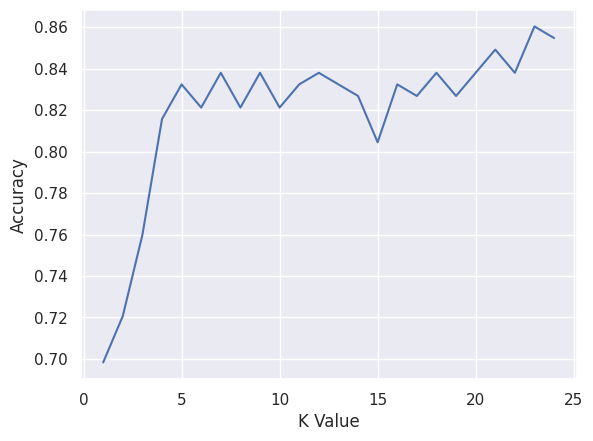

In [230]:
plt.plot(k_range, scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [232]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)

#fit
knn.fit(x_train, y_train)

#predict
knn_pred = knn.predict(x_val)



/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


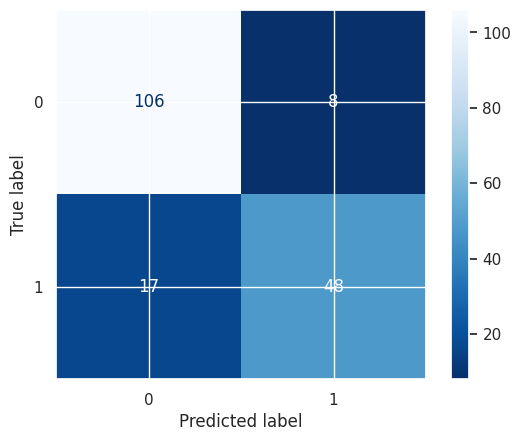

In [233]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_val, y_val, cmap="Blues_r") 

In [234]:
accuracy_score(y_val, knn_pred)

0.8603351955307262

In [235]:


predicciones = knn.predict(test_df2)
test_df.index
pred = pd.DataFrame(predicciones, columns = ['Survived'])
pred['PassengerId'] = test_df.index

pred2 = pred.set_index('PassengerId')
pred2.to_csv('prediccionesKnnTitanic.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=531e4951-1dc4-4f99-aca2-e009f5ab1fed' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>